In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

%matplotlib inline

In [2]:
df = pd.read_csv('results_new.csv')
df['start_date'] = df['start_date'].astype('datetime64') 
df['end_date'] = df['end_date'].astype('datetime64') 
df.head()

,id,start_date,end_date
0,86931,2017-03-01 00:22:48.286,2017-03-01 15:26:44.256
1,108106,2017-03-01 02:38:05.390,2017-03-01 05:53:35.027
2,54868,2017-03-01 03:00:35.932,2017-03-01 05:51:36.670
3,200108,2017-03-01 03:21:30.803,2017-03-01 06:50:56.485
4,76101,2017-03-01 03:36:09.011,2017-03-01 06:01:14.587


In [3]:
df['duration'] = df.apply(lambda row: (row['end_date'] - row['start_date']).total_seconds() / 3600, axis=1)
df['start_hour'] = df['start_date'].dt.hour
df['start_day_period'] = (df['start_hour'] % 24 + 4) // 4
df['start_day_period'].replace({1: 'Late Night',
                        2: 'Early Morning',
                        3: 'Morning',
                        4: 'Noon',
                        5: 'Evening',
                        6: 'Night'}, inplace=True)
df.head()

,id,start_date,end_date,duration,start_hour,start_day_period
0,86931,2017-03-01 00:22:48.286,2017-03-01 15:26:44.256,15.065547,0,Late Night
1,108106,2017-03-01 02:38:05.390,2017-03-01 05:53:35.027,3.258233,2,Late Night
2,54868,2017-03-01 03:00:35.932,2017-03-01 05:51:36.670,2.850205,3,Late Night
3,200108,2017-03-01 03:21:30.803,2017-03-01 06:50:56.485,3.490467,3,Late Night
4,76101,2017-03-01 03:36:09.011,2017-03-01 06:01:14.587,2.418216,3,Late Night


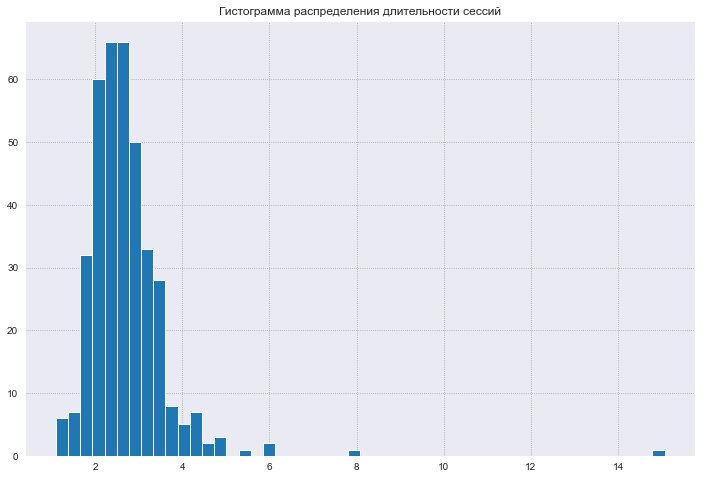

In [4]:
plt.figure(figsize=(12,8))

plt.title('Гистограмма распределения длительности сессий')
plt.hist(df['duration'], bins=50)
plt.show()

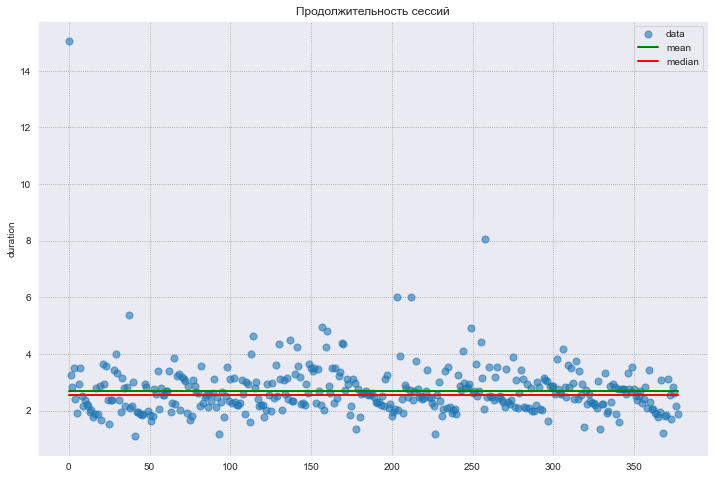

In [5]:
plt.figure(figsize=(12,8))

mean = [df['duration'].mean()] * len(df)
median = [df['duration'].median()] * len(df)

plt.title('Продолжительность сессий')
plt.scatter(df.index, df['duration'], alpha=0.6, s=50, label='data')
plt.plot(mean, color = 'green', linewidth=2.0, label='mean')
plt.plot(median, color='red', linewidth=2.0, label='median')
plt.ylabel('duration')
plt.legend()
plt.show()

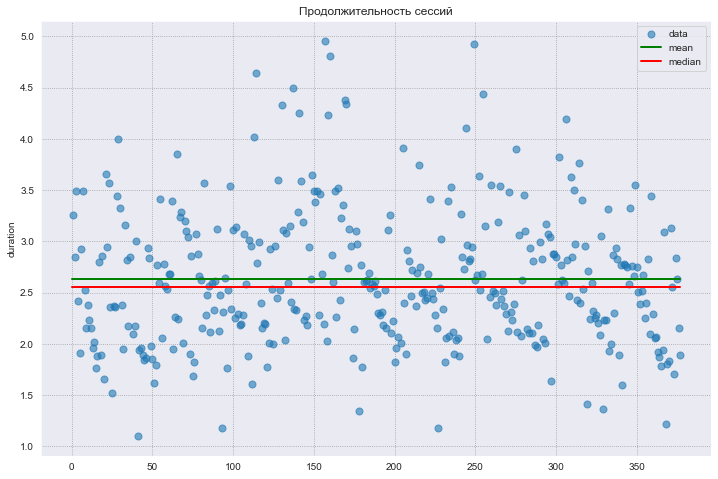

In [9]:
plt.figure(figsize=(12,8))

mean = [df[df['duration'] < 5]['duration'].mean()] * len(df)
median = [df[df['duration'] < 5]['duration'].median()] * len(df)

plt.title('Продолжительность сессий')
plt.scatter(df[df['duration'] < 5].index, df[df['duration'] < 5]['duration'], alpha=0.6, s=50, label='data')
plt.plot(mean, color = 'green', linewidth=2.0, label='mean')
plt.plot(median, color='red', linewidth=2.0, label='median')
plt.ylabel('duration')
plt.legend()
plt.show()

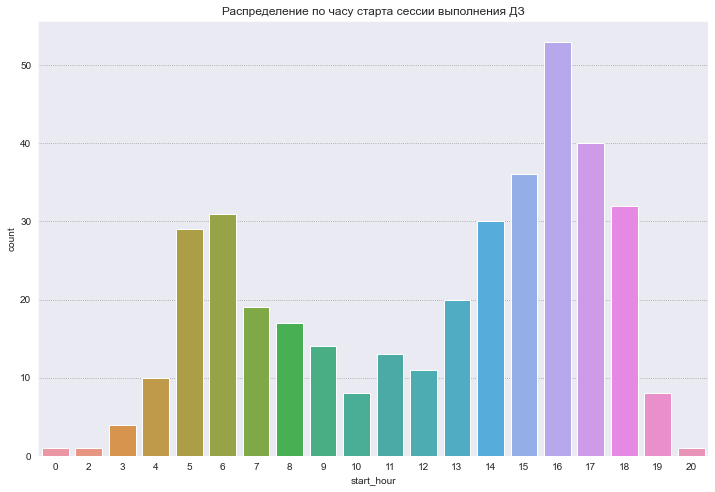

In [10]:
plt.figure(figsize=(12,8))
plt.title('Распределение по часу старта сессии выполнения ДЗ')
sns.countplot(df['start_hour'])
plt.show()

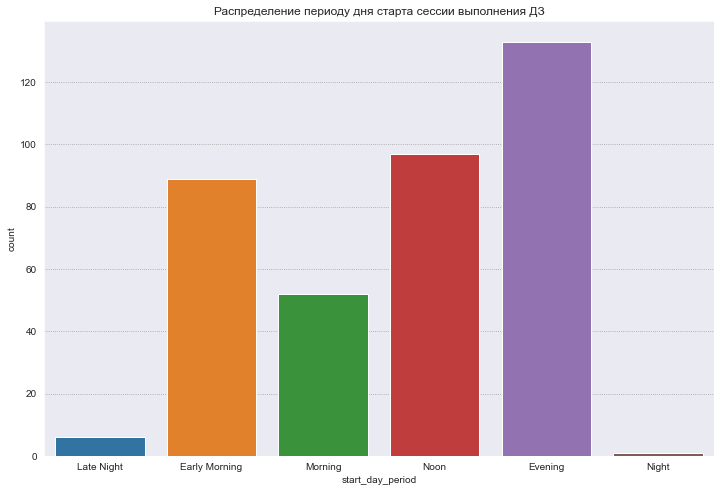

In [11]:
plt.figure(figsize=(12,8))
plt.title('Распределение периоду дня старта сессии выполнения ДЗ')
sns.countplot(df['start_day_period'])
plt.show()